# Autoregressive models

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.core import datetools
from pandas import Series, DataFrame


C:\Users\Vardan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [2]:
#load the .dta (stata) format data on US GDP from quarter 2, 1985 to quarter 3, 2009 (g GDP, u Unempl)
df = pd.read_stata('okun.dta')

In [3]:
df.head()

,g,u
0,1.4,7.3
1,2.0,7.2
2,1.4,7.0
3,1.5,7.0
4,0.9,7.2


In [4]:
ts = pd.period_range('1985Q2', periods=98, freq='Q')

In [5]:
df['Date'] = ts

In [6]:
df.tail()

,g,u,Date
93,0.3,6.1,2008Q3
94,-1.4,6.9,2008Q4
95,-1.2,8.1,2009Q1
96,-0.2,9.3,2009Q2
97,0.8,9.6,2009Q3


In [7]:
df.set_index('Date')

,g,u
Date,,
1985Q2,1.4,7.3
1985Q3,2.0,7.2
1985Q4,1.4,7.0
1986Q1,1.5,7.0
1986Q2,0.9,7.2
1986Q3,1.5,7.0
1986Q4,1.2,6.8
1987Q1,1.5,6.6
1987Q2,1.6,6.3


In [8]:
gdp = df.set_index('Date')['g']

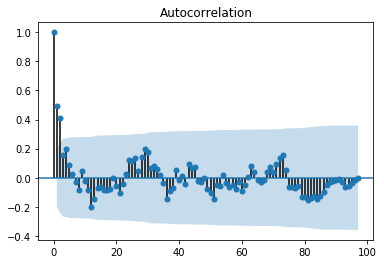

In [9]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(gdp)

In [10]:
#Start Arima 
from statsmodels.tsa.arima_model import ARIMA

                              ARMA Model Results                              
Dep. Variable:                      g   No. Observations:                   98
Model:                     ARMA(2, 0)   Log Likelihood                 -79.343
Method:                       css-mle   S.D. of innovations              0.543
Date:                Thu, 15 Mar 2018   AIC                            166.685
Time:                        14:10:23   BIC                            177.025
Sample:                    06-30-1985   HQIC                           170.867
                         - 09-30-2009                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2663      0.140      9.014      0.000       0.991       1.542
ar.L1.g        0.3745      0.097      3.845      0.000       0.184       0.565
ar.L2.g        0.2439      0.100      2.427      0.0

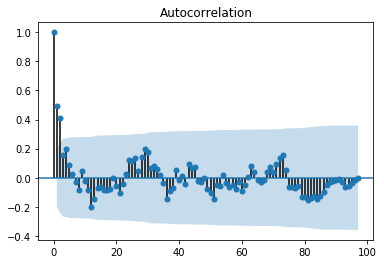

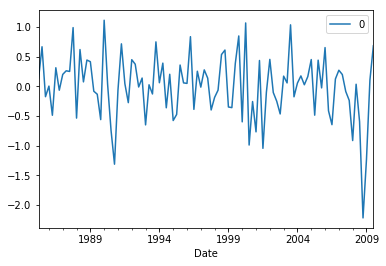

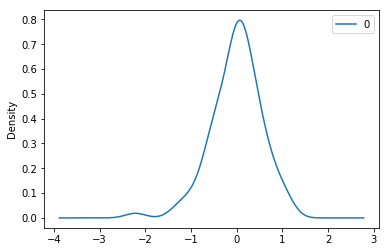

               0
count  98.000000
mean   -0.002834
std     0.545682
min    -2.215114
25%    -0.328608
50%     0.041124
75%     0.348088
max     1.113891


In [11]:
# fit AR(p) model
model = ARIMA(gdp, order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## Forecasting using the model

predicted=1.205309, expected=1.300000
predicted=1.182934, expected=0.000000
predicted=1.196062, expected=0.700000
predicted=0.889885, expected=1.200000
predicted=1.182757, expected=1.000000
predicted=1.274634, expected=0.900000
predicted=1.198172, expected=0.600000
predicted=1.101983, expected=1.100000
predicted=1.107055, expected=1.100000
predicted=1.241997, expected=2.200000
predicted=1.438619, expected=1.400000
predicted=1.595357, expected=1.600000
predicted=1.418354, expected=1.600000
predicted=1.473489, expected=1.500000
predicted=1.457623, expected=1.600000
predicted=1.449822, expected=1.900000
predicted=1.533557, expected=1.100000
predicted=1.475014, expected=1.800000
predicted=1.373627, expected=1.400000
predicted=1.504129, expected=2.100000
predicted=1.507286, expected=1.200000
predicted=1.571606, expected=0.800000
predicted=1.246604, expected=1.200000
predicted=1.203156, expected=1.400000
predicted=1.340483, expected=1.500000
predicted=1.408328, expected=1.300000
predicted=1.

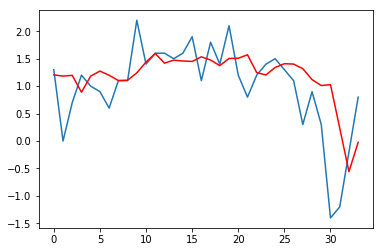

In [12]:
from sklearn.metrics import mean_squared_error

X = gdp.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Out of sample forecasts for 3 quarters with standard errors

In [13]:
X = gdp.values
model = ARIMA(X, order=(2,0,0))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=3)[0]

In [14]:
forecast

array([ 0.73409723,  0.95328125,  1.01928619])

In [15]:
from statsmodels.tsa.arima_model import ARMAResults

In [16]:
results = ARIMA(X, order=(2,0,0)).fit()
results.forecast(steps=3)

(array([ 0.73409723,  0.95328125,  1.01928619]),
 array([ 0.5426006 ,  0.5793953 ,  0.61573634]),
 array([[-0.3293804 ,  1.79757485],
        [-0.18231266,  2.08887516],
        [-0.18753485,  2.22610724]]))